In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Read the dataset
df = pd.read_csv('/content/air_quality.csv')

# Display the first few rows
df.head()


,pm25,no2,temperature,quality_level
0,157.744434,5.376279,31.109108,high
1,101.270316,130.903661,19.298140,low
2,197.204350,17.254966,37.652832,high
3,81.580404,91.605322,39.682532,low
4,152.419877,148.007264,12.175063,low


In [14]:


# Drop rows with missing values
df = df.dropna()

# Display basic information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pm25           100 non-null    float64
 1   no2            100 non-null    float64
 2   temperature    100 non-null    float64
 3   quality_level  100 non-null    object 
dtypes: float64(3), object(1)
memory usage: 3.3+ KB
None


In [20]:
# Extract individual feature arrays
pm25 = df['pm25'].values
no2 = df['no2'].values
temp = df['temperature'].values

# Calculate score using a simple weighted formula
score = (pm25 / 5) + (no2 / 10) + (temp / 10)

# Define conditions and AQI levels
conditions = [
    score <= 20,
    (score > 20) & (score <= 40),
    (score > 40) & (score <= 60),
    (score > 60) & (score <= 80),
    (score > 80) & (score <= 100),
    score > 100
]

aqi_levels = [
    'Good',
    'Moderate',
    'Unhealthy for Sensitive Groups',
    'Unhealthy',
    'Very Unhealthy',
    'Hazardous'
]

# Apply AQI classification
df['Predicted_AQI'] = np.select(conditions, aqi_levels, default='Unknown')

# Display the first 10 rows
df[['pm25', 'no2', 'temperature', 'Predicted_AQI']].head(10)


,pm25,no2,temperature,Predicted_AQI
0,157.744434,5.376279,31.109108,Moderate
1,101.270316,130.903661,19.298140,Moderate
2,197.204350,17.254966,37.652832,Unhealthy for Sensitive Groups
3,81.580404,91.605322,39.682532,Moderate
4,152.419877,148.007264,12.175063,Unhealthy for Sensitive Groups
5,84.667995,82.805644,18.273000,Moderate
6,167.541202,138.986055,37.425730,Unhealthy for Sensitive Groups
7,118.125479,39.236897,30.255879,Moderate
8,22.067248,115.193534,6.683313,Good
9,16.996155,82.033534,32.353007,Good


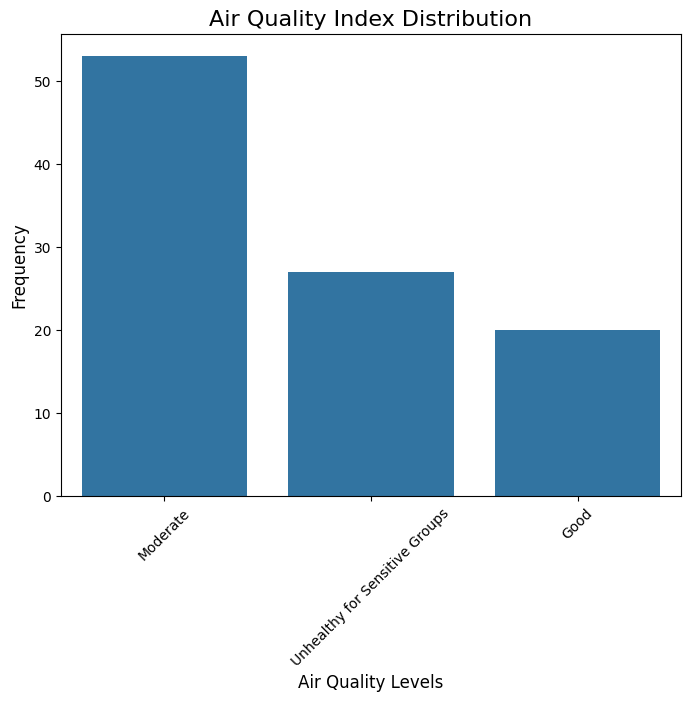

In [22]:
# Count the AQI levels
aqi_counts = df['Predicted_AQI'].value_counts()

# Plot the distribution of AQI levels
plt.figure(figsize=(8, 6))
sns.barplot(x=aqi_counts.index, y=aqi_counts.values)
plt.title("Air Quality Index Distribution", fontsize=16)
plt.xlabel("Air Quality Levels", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.show()
